In [1]:
import mysql.connector
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [2]:
# 🔹 Connect to MySQL
def connect_to_mysql():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password="Bala@2006",
        database="datas"
    )

# 🔹 Fetch data from MySQL
def fetch_data(cursor):
    cursor.execute("SELECT * FROM sales_data;")  
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Extract column names
    return pd.DataFrame(data, columns=columns)

In [3]:
conn = connect_to_mysql()  # Ensure connection
cursor = conn.cursor()
df = fetch_data(cursor)    # Fetch data and assign to df


In [4]:
df.head(10)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
0,295665.0,Macbook Pro Laptop,1.00000,1700.000,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,295666.0,LG Washing Machine,1.00000,600.000,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,295667.0,USB-C Charging Cable,1.00000,11.950,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,295668.0,27in FHD Monitor,1.00000,184.375,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,NaN,USB-C Charging Cable,1.00000,11.950,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
5,295670.0,AA Batteries (4-pack),1.00000,3.840,31-12-2019 22:58,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City,22.0
6,295671.0,USB-C Charging Cable,1.00000,11.950,16-12-2019 15:10,"928 12th St, Portland, OR 97035",12.0,11.95,Portland,15.0
7,295672.0,USB-C Charging Cable,2.00000,11.950,13-12-2019 09:29,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas,9.0
8,295673.0,Bose SoundSport Headphones,1.00000,99.990,15-12-2019 23:26,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas,23.0
9,295674.0,AAA Batteries (4-pack),1.12464,2.990,28-12-2019 11:51,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas,11.0


In [5]:
miss_values=df.isnull().sum()
miss_values

Order_ID            13016
Product                 0
Quantity_Ordered    12545
Price_Each          12573
Order_Date              0
Purchase_Address        0
Month               12571
Sales               12537
City                    0
Hour                12582
dtype: int64

In [6]:


# Imputation
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Order_ID']])  
df[['Order_ID']] = imputer.transform(df[['Order_ID']])
#imputation
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Quantity_Ordered']]) 
df[['Quantity_Ordered']] = imputer.transform(df[['Quantity_Ordered']])
#imputation
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Price_Each']]) 
df[['Price_Each']] = imputer.transform(df[['Price_Each']])
#imputation
imputer = SimpleImputer(strategy='median')
imputer.fit(df[['Month']]) 
df[['Month']] = imputer.transform(df[['Month']])
#imputation
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['Sales']]) 
df[['Sales']] = imputer.transform(df[['Sales']])


In [7]:
#after cleaning
miss_values1=df.isnull().sum()
miss_values1

Order_ID                0
Product                 0
Quantity_Ordered        0
Price_Each              0
Order_Date              0
Purchase_Address        0
Month                   0
Sales                   0
City                    0
Hour                12582
dtype: int64

In [8]:
#EXPLORING DATATYPES IN A DATA FRAME
df.dtypes

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
Month               float64
Sales               float64
City                 object
Hour                float64
dtype: object

In [9]:
#CHANGING DATATYPES IN COLUMNS 
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)
df['Hour'] = pd.to_datetime(df['Hour'], format='%Y-%m-%d %H:%M:%S', errors='coerce') 

In [11]:
# FINDING UNIQUE VALUES FOR EACH COLUMN
unique_values1 = df['Product'].unique()
unique_values2 = df['City'].unique()

print(f"PRODUCT: {unique_values1}", end=" ")
print(f"CITY: {unique_values2}")


PRODUCT: ['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'LG Dryer'] CITY: [' New York City' ' San Francisco' ' Atlanta' ' Portland' ' Dallas'
 ' Los Angeles' ' Boston' ' Austin' ' Seattle']


In [12]:
#CHECKING FOR DUPLICATES
duplicates=df.duplicated()
df[duplicates]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
438,296081.0,Flatscreen TV,1.00000,300.000,2019-12-30 16:52:00,"970 Sunset St, Austin, TX 73301",12.0,300.000,Austin,NaT
1048,296668.0,AAA Batteries (4-pack),1.12464,184.375,2019-12-20 16:07:00,"535 7th St, San Francisco, CA 94016",12.0,185.192,San Francisco,NaT
1727,297311.0,Bose SoundSport Headphones,1.00000,99.990,2019-12-07 07:30:00,"858 Willow St, Los Angeles, CA 90001",12.0,99.990,Los Angeles,NaT
2812,298358.0,Apple Airpods Headphones,1.00000,150.000,2019-12-04 15:57:00,"482 8th St, San Francisco, CA 94016",12.0,150.000,San Francisco,NaT
3119,298657.0,Lightning Charging Cable,1.00000,14.950,2019-12-01 18:22:00,"428 12th St, Atlanta, GA 30301",12.0,14.950,Atlanta,NaT
...,...,...,...,...,...,...,...,...,...,...
177673,214960.0,Bose SoundSport Headphones,1.00000,99.990,2019-06-20 04:29:00,"616 Cedar St, Portland, OR 97035",6.0,99.990,Portland,NaT
179084,216321.0,USB-C Charging Cable,1.00000,11.950,2019-06-19 16:11:00,"586 Wilson St, Seattle, WA 98101",6.0,11.950,Seattle,NaT
180006,217210.0,Apple Airpods Headphones,1.00000,150.000,2019-06-11 15:31:00,"258 10th St, Boston, MA 02215",6.0,150.000,Boston,NaT
181613,218756.0,AAA Batteries (4-pack),1.00000,2.990,2019-06-11 14:54:00,"362 Hickory St, Boston, MA 02215",6.0,2.990,Boston,NaT


In [13]:
df.drop_duplicates(inplace=True)
duplicates1=df.duplicated()
df[duplicates1]


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour


In [14]:
#SORTING OF DATASET
sort_month=df.sort_values(by='Month',ascending=True)
sort_month

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City,Hour
139292,143617.000000,Lightning Charging Cable,1.0,183.940957,2019-01-08 23:17:00,"679 12th St, Los Angeles, CA 90001",1.0,14.950000,Los Angeles,NaT
143166,147323.000000,AA Batteries (4-pack),1.0,3.840000,2019-01-05 09:30:00,"88 4th St, San Francisco, CA 94016",1.0,3.840000,San Francisco,NaT
143165,230385.256346,Wired Headphones,1.0,11.990000,2019-01-30 13:34:00,"262 Church St, Los Angeles, CA 90001",1.0,11.990000,Los Angeles,NaT
143164,147321.000000,USB-C Charging Cable,1.0,11.950000,2019-01-12 15:46:00,"303 Hickory St, Austin, TX 73301",1.0,184.768912,Austin,NaT
143163,147320.000000,USB-C Charging Cable,1.0,183.940957,2019-01-15 06:30:00,"57 Madison St, San Francisco, CA 94016",1.0,11.950000,San Francisco,NaT
...,...,...,...,...,...,...,...,...,...,...
20924,315764.000000,Wired Headphones,1.0,11.990000,2019-12-31 14:01:00,"523 Walnut St, Seattle, WA 98101",12.0,11.990000,Seattle,NaT
20923,315763.000000,27in FHD Monitor,1.0,149.990000,2019-12-24 19:12:00,"970 Jefferson St, Atlanta, GA 30301",12.0,149.990000,Atlanta,NaT
20921,315761.000000,Lightning Charging Cable,1.0,14.950000,2019-12-11 08:01:00,"13 Forest St, New York City, NY 10001",12.0,14.950000,New York City,NaT
20919,315759.000000,Wired Headphones,1.0,11.990000,2019-12-21 10:14:00,"492 North St, Los Angeles, CA 90001",12.0,11.990000,Los Angeles,NaT


In [15]:
#droping column
df=df.drop('Hour',axis=1)
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
0,295665.000000,Macbook Pro Laptop,1.0,1700.000,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City
1,295666.000000,LG Washing Machine,1.0,600.000,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City
2,295667.000000,USB-C Charging Cable,1.0,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City
3,295668.000000,27in FHD Monitor,1.0,184.375,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco
4,230385.256346,USB-C Charging Cable,1.0,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta


# FILTERING DATA AND STORING TO EXCEL


In [18]:
#EXPORTING FULL DATA
df.to_csv("full_data_full.csv", index=False)

In [19]:
# Export filtered data to Excel

def export_filtered_data(df, filename):
    df.to_excel(filename, index=False)
    print(f"✅ Filtered data exported successfully to {filename}")

# Filtering Data
filter_firsthalf = df[(df['Month'] >= 1.0) & (df['Month'] <= 6.0)]
filter_secondhalf = df[(df['Month'] >= 7.0) & (df['Month'] <= 12.0)]

#Exporting the data
export_filtered_data(filter_firsthalf, "first_half_data.xlsx")
export_filtered_data(filter_secondhalf, "second_half_data.xlsx")


Exception ignored in: <function ZipFile.__del__ at 0x000001451CF05D30>
Traceback (most recent call last):
  File "c:\Users\balac\AppData\Local\Programs\Python\Python39\lib\zipfile.py", line 1807, in __del__
    self.close()
  File "c:\Users\balac\AppData\Local\Programs\Python\Python39\lib\zipfile.py", line 1824, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


✅ Filtered data exported successfully to first_half_data.xlsx
✅ Filtered data exported successfully to second_half_data.xlsx


# EDA 

In [20]:
#FRQUENCY AND PERCENTAGE ANALYSIS
frequency_product=df['Product'].value_counts()
print("FRQUENCY OF AN PRODUCT:")
frequency_product

FRQUENCY OF AN PRODUCT:


Product
USB-C Charging Cable          21881
Lightning Charging Cable      21636
AAA Batteries (4-pack)        20625
AA Batteries (4-pack)         20565
Wired Headphones              18867
Apple Airpods Headphones      15536
Bose SoundSport Headphones    13312
27in FHD Monitor               7504
iPhone                         6842
27in 4K Gaming Monitor         6227
34in Ultrawide Monitor         6178
Google Phone                   5524
Flatscreen TV                  4796
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [21]:
#PERCENTAGE
perc_product=frequency_product/len(df['Product'])
print('PERCENTAGE OF PRODUCTS:')
perc_product

PERCENTAGE OF PRODUCTS:


Product
USB-C Charging Cable          0.117754
Lightning Charging Cable      0.116435
AAA Batteries (4-pack)        0.110995
AA Batteries (4-pack)         0.110672
Wired Headphones              0.101534
Apple Airpods Headphones      0.083608
Bose SoundSport Headphones    0.071639
27in FHD Monitor              0.040383
iPhone                        0.036821
27in 4K Gaming Monitor        0.033511
34in Ultrawide Monitor        0.033247
Google Phone                  0.029728
Flatscreen TV                 0.025810
Macbook Pro Laptop            0.025422
ThinkPad Laptop               0.022215
20in Monitor                  0.022054
Vareebadd Phone               0.011113
LG Washing Machine            0.003584
LG Dryer                      0.003476
Name: count, dtype: float64

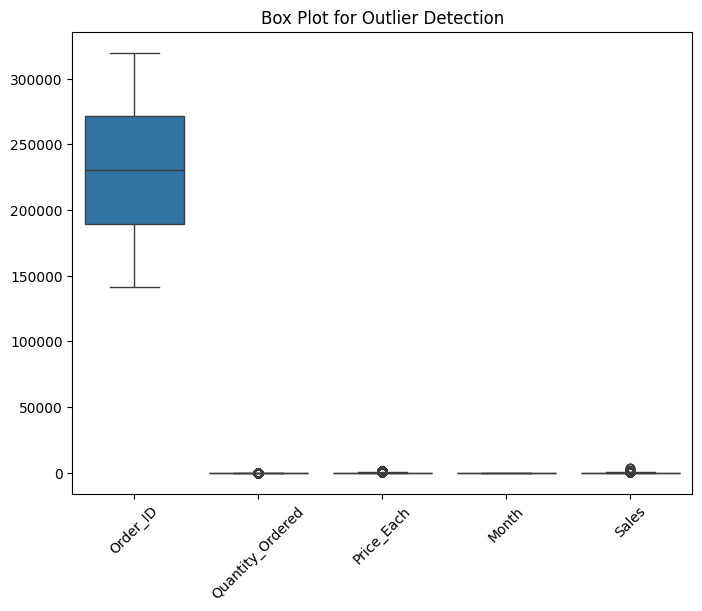

In [22]:
#BOX PLOT FOR OUTLIER DETECTION
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.select_dtypes(include='float64'))
plt.title('Box Plot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# IQR-Based Outlier Removal

In [23]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [24]:
# Remove Order_ID from numeric columns
numeric_cols = numeric_cols.drop('Order_ID', errors='ignore')

# IQR Outlier Removal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                   (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original Data Shape: {df.shape}")
print(f"Filtered Data Shape: {filtered_df.shape}")


Original Data Shape: (185820, 9)
Filtered Data Shape: (135895, 9)


In [25]:
filtered_df.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales,City
2,295667.000000,USB-C Charging Cable,1.0,11.950,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City
3,295668.000000,27in FHD Monitor,1.0,184.375,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco
4,230385.256346,USB-C Charging Cable,1.0,11.950,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta
5,295670.000000,AA Batteries (4-pack),1.0,3.840,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City
6,295671.000000,USB-C Charging Cable,1.0,11.950,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland


# EXPORTING REMOVED OUTLIERS DATA TO EXCEL

In [38]:


# Save full filtered data
filtered_df.to_excel("cleaned_data.xlsx", index=False)

# Filter data for months 1-6
filtered_1_6 = filtered_df[filtered_df['Month'].between(1, 6)]

# Filter data for months 7-12
filtered_7_12 = filtered_df[filtered_df['Month'].between(7, 12)]

# Save all data in one Excel file with multiple sheets
with pd.ExcelWriter("filtered_data_sheets.xlsx") as writer:
    filtered_df.to_excel(writer, sheet_name='Full Data', index=False)
    filtered_1_6.to_excel(writer, sheet_name='Months 1-6', index=False)
    filtered_7_12.to_excel(writer, sheet_name='Months 7-12', index=False)

print("✅ Data saved successfully!")


✅ Data saved successfully!


---------------------------------------------------------


Correlation Matrix:
                   Order_ID  Quantity_Ordered  Price_Each     Month     Sales
Order_ID          1.000000          0.000303   -0.004480  0.922869 -0.003082
Quantity_Ordered  0.000303          1.000000   -0.138083 -0.000483 -0.129006
Price_Each       -0.004480         -0.138083    1.000000 -0.006157  0.928106
Month             0.922869         -0.000483   -0.006157  1.000000 -0.004223
Sales            -0.003082         -0.129006    0.928106 -0.004223  1.000000


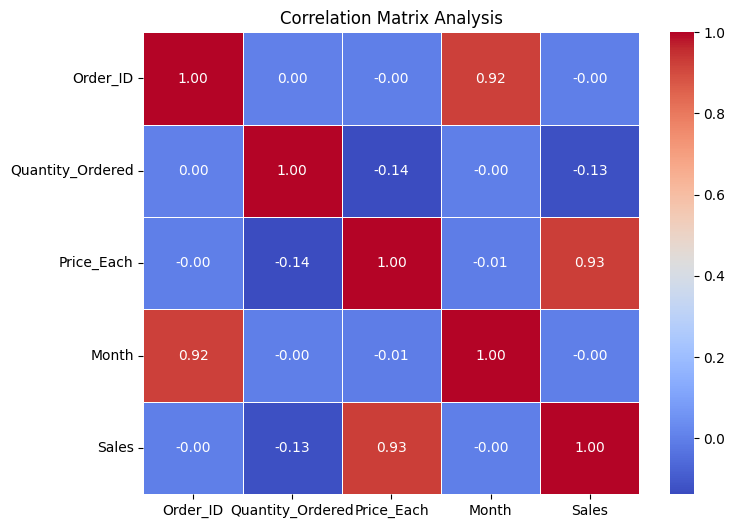

In [31]:
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Analysis')
plt.show()

# DATA VISUALIZATION


Grouped products 
 Product
Macbook Pro Laptop        1585.379183
ThinkPad Laptop            937.028301
iPhone                     659.338975
LG Washing Machine         576.308136
LG Dryer                   570.433771
Google Phone               568.332866
Vareebadd Phone            381.879713
27in 4K Gaming Monitor     375.233214
34in Ultrawide Monitor     367.830790
Flatscreen TV              293.637961
Name: Sales, dtype: float64


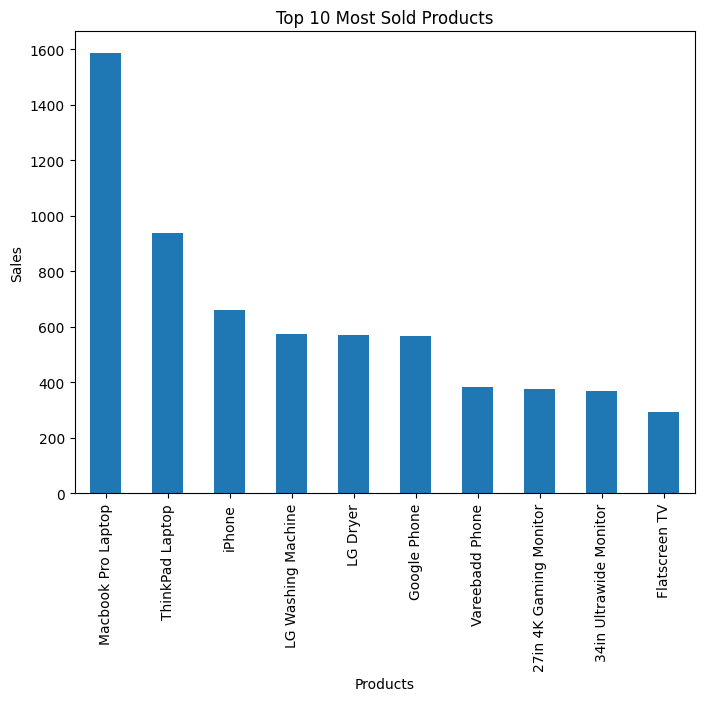

In [32]:
# 1-->Top 10 Most Sold Products
group_products = df.groupby('Product')['Sales'].mean()
group_products = group_products.sort_values(ascending=False).head(10)  #top 10
print('Grouped products \n',group_products)
plt.figure(figsize=(8,6))
group_products.plot(kind='bar')
plt.title("Top 10 Most Sold Products")
plt.ylabel("Sales")
plt.xlabel("Products")
plt.show()

Month
1.0     1.673894e+06
2.0     2.031506e+06
3.0     2.621136e+06
4.0     3.152096e+06
5.0     2.894818e+06
6.0     2.402094e+06
7.0     4.882178e+06
8.0     2.070424e+06
9.0     1.965531e+06
10.0    3.475603e+06
11.0    2.957891e+06
12.0    4.221600e+06
Name: Sales, dtype: float64


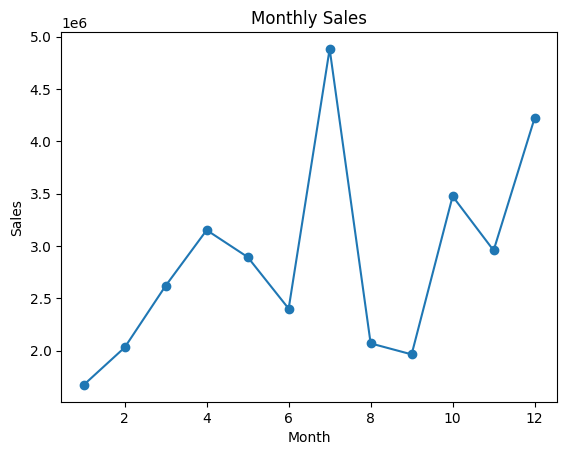

In [33]:
# 2-->Monthly Sales
monthly_sales = df.groupby('Month')['Sales'].sum()
print(monthly_sales)
monthly_sales.plot(kind='line', marker='o')

plt.title("Monthly Sales")  # ✅ Correct function call
plt.xlabel("Month")  # ✅ Correct function call
plt.ylabel("Sales")
plt.show()

Top 5 City Sales 
 City
San Francisco    8.238125e+06
Los Angeles      5.431209e+06
New York City    4.626583e+06
Boston           3.645252e+06
Dallas           2.767547e+06
Name: Sales, dtype: float64


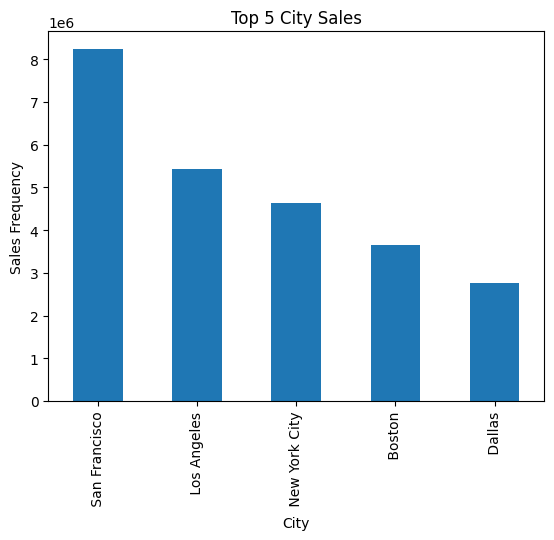

In [34]:
# 3-->Top 5 City Sales
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 City Sales \n",city_sales)
city_sales.plot(kind='bar')
plt.title("Top 5 City Sales")
plt.ylabel('Sales Frequency')
plt.xlabel('City')
plt.show()

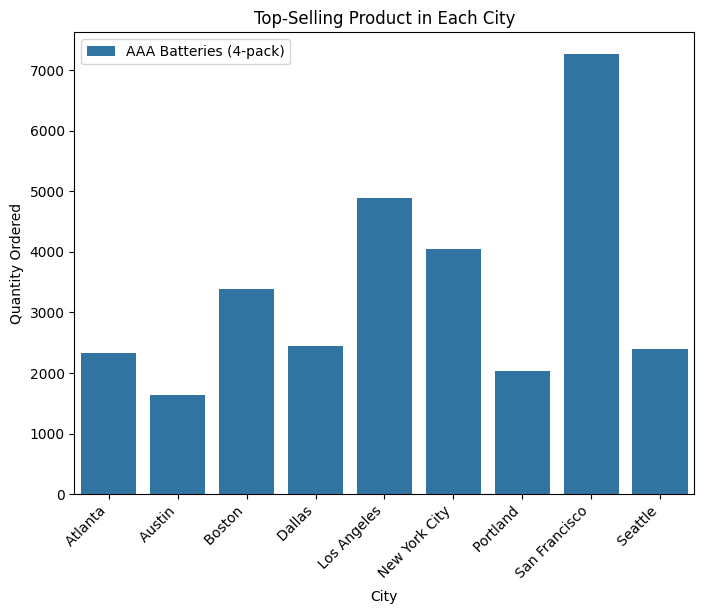

In [35]:
# 4-->Top-Selling Product in Each City
# Group by 'City' and 'Product', summing the 'Quantity_Ordered'
city_product_sales = df.groupby(['City', 'Product'])['Quantity_Ordered'].sum()
top_selling_products = city_product_sales.groupby('City').idxmax()
# Extract City and Product separately for plotting
city_names = [city for city, product in top_selling_products]
product_names = [product[1] for product in top_selling_products]
plt.figure(figsize=(8,6))
sns.barplot(x=city_names, y=city_product_sales.groupby('City').max().values, hue=product_names)
plt.title("Top-Selling Product in Each City")
plt.xlabel("City")
plt.ylabel("Quantity Ordered")
plt.xticks(rotation=45, ha='right')
plt.show()


Top 3 Month Sales in a Year 
 Year-Month
2019-12    4.533353e+06
2019-10    3.736841e+06
2019-04    3.373526e+06
Freq: M, Name: Sales, dtype: float64


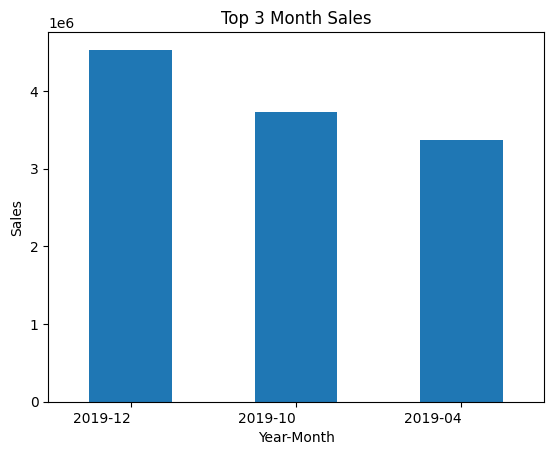

In [36]:

# 5--># 
df['Year-Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Year-Month')['Sales'].sum()
top_3_months = monthly_sales.sort_values(ascending=False).head(3)
print("Top 3 Month Sales in a Year \n",top_3_months)

top_3_months.plot(kind='bar')
plt.title("Top 3 Month Sales")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.xticks(rotation=360, ha='right')
plt.show()

In [37]:

print("\n🔹 Data Overview:")
df.info()
print("\n🔹 First 5 Rows:\n", df.head())
print("\n🔹 Null Values:\n", df.isnull().sum())
print("\n🔹 Numeric Column Data Types:\n", df[numeric_cols].dtypes)
print("\n🔹 Unique Values Count per Column:\n", df[numeric_cols].nunique())


🔹 Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 185820 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185820 non-null  float64       
 1   Product           185820 non-null  object        
 2   Quantity_Ordered  185820 non-null  float64       
 3   Price_Each        185820 non-null  float64       
 4   Order_Date        185820 non-null  datetime64[ns]
 5   Purchase_Address  185820 non-null  object        
 6   Month             185820 non-null  float64       
 7   Sales             185820 non-null  float64       
 8   City              185820 non-null  object        
 9   Year-Month        185820 non-null  period[M]     
dtypes: datetime64[ns](1), float64(5), object(3), period[M](1)
memory usage: 15.6+ MB

🔹 First 5 Rows:
         Order_ID               Product  Quantity_Ordered  Price_Each  \
0  295665.000000    Macbook Pro Laptop  